In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

%matplotlib inline

In [2]:
df_1 = 'df_final_demo.csv'
df_2= 'df_final_experiment_clients.csv'
df_3 = 'df_final_web_data_merged.csv'

#df_t1 = 'df_final_web_data_pt_1.csv'

df_fd = pd.read_csv(df_1)
df_fe_c = pd.read_csv(df_2)
df_fw_dm = pd.read_csv(df_3)
#df_p1 = pd.read_csv(df_t1)


C:\Users\dylan\AppData\Local\Temp\ipykernel_34332\688577527.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fw_dm = pd.read_csv(df_3)


In [3]:
df_fw_dm

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755402,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755403,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755404,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_fe_c

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


The marked client ID's are the one that were in the test, the others were not in the test

In [6]:
df_fd

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
df_fw_dm.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [8]:
df_fw_dm

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755402,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755403,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755404,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [9]:
df_fw_dm.drop([343141], inplace = True)

In [10]:
# use this to change the scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df_fd.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70609.00,5004991.88,2877277.63,169.00,2519329.00,5016978.00,7483085.00,9999839.00
clnt_tenure_yr,70595.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70595.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.44,15.59,13.50,32.50,47.00,59.00,96.00
num_accts,70595.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70595.00,147445.24,301508.71,13789.42,37346.83,63332.90,137544.90,16320040.15
calls_6_mnth,70595.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70595.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


In [11]:
df_sub = df_fd[df_fd['bal'].isnull()]

In [12]:
df_sub

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_fd.dropna(inplace = True)

In [14]:
df_fd.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [15]:
df_fd = df_fd.astype({'clnt_tenure_yr': int,'clnt_tenure_mnth': int,'clnt_age': int,'calls_6_mnth': int,'logons_6_mnth': int,'num_accts': int })


In [16]:
df_fd

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,61,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [17]:
df_fe_c.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [18]:
df_fe_c.dropna(inplace = True)

In [19]:
df_fe_c.rename(columns={'Variation':'variation'}, inplace = True)

In [20]:
df_fe_c.variation.value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

In [21]:
df_fd['gendr'].replace({'X': 'U'}, inplace=True)


In [22]:
test_subjects_df = pd.merge(df_fw_dm, df_fe_c, on='client_id')

## Who are the primary clients who use this online process?

In [23]:
df_fd['logons_6_mnth'].describe()

count   70594.00
mean        5.57
std         2.35
min         1.00
25%         4.00
50%         5.00
75%         7.00
max         9.00
Name: logons_6_mnth, dtype: float64

This tells us that only clients who logged in at least once in the last six months are considered clients at all.
 
The mean number of logins in 5.57 times a month, with the median being 5, so on average a customer will logon to the service just under once a month. 

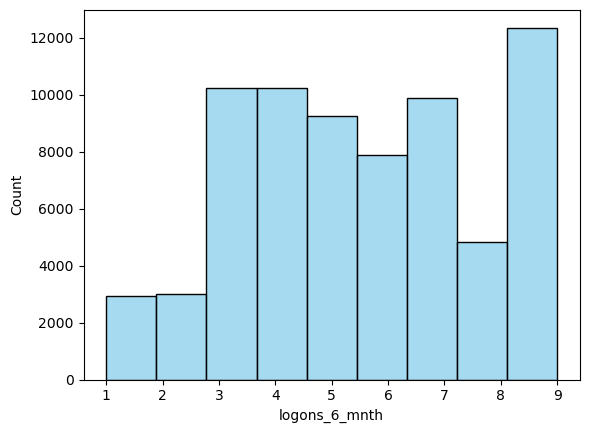

In [25]:
sns.histplot(df_fd['logons_6_mnth'], bins=9, color="skyblue");

A quick glance at a histogram shows that there isn't an even distribution of user logins, so that won't help us determine what a "typical" customer logon rate looks like. 

So, I'm going to just pull information on those customers who log in at least once every other month, or 3 times every 6 months. It seems from this histogram like customers who log in less frequently than that are a typical anyway. 

In [26]:
# Create a subset of data containing only those clients who logged on more than twice in the last six months. 
logon_three = df_fd[df_fd['logons_6_mnth'] > 2]

logon_three.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,64647.00,5005047.00,2879203.12,169.00,2515105.00,5019785.00,7483242.50,9999839.00
clnt_tenure_yr,64647.00,12.10,6.92,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,64647.00,151.23,82.64,33.00,82.00,137.00,193.00,749.00
clnt_age,64647.00,46.53,15.63,13.00,33.00,47.00,59.00,96.00
num_accts,64647.00,2.27,0.55,1.00,2.00,2.00,2.00,8.00
bal,64647.00,153563.97,311035.75,13791.80,39010.96,65984.81,143617.72,16320040.15
calls_6_mnth,64647.00,3.56,2.25,0.00,2.00,4.00,6.00,7.00
logons_6_mnth,64647.00,5.94,2.09,3.00,4.00,6.00,8.00,9.00


In [27]:
df_fd.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70594.00,5005025.75,2877289.31,169.00,2519542.75,5016973.50,7483074.25,9999839.00
clnt_tenure_yr,70594.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70594.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.18,15.60,13.00,32.00,47.00,59.00,96.00
num_accts,70594.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70594.00,147446.73,301510.58,13789.42,37346.60,63334.59,137546.12,16320040.15
calls_6_mnth,70594.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70594.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


Comparing the subset with the whole dataframe, it seems that there isn't much difference between the two when looking at regular descriptive statistics, meaning that the original can be used without much issue. 

Going solely off of descriptive statistics, it seems that typical* clients are as follows.
- They have been with the company for between 6 and 18 years, or between 70 and 220 months. 
- They are typically between 30 and 60 years old. 
- They have up to 3 accounts. 
- They carry a balance with the company of up to 450,000.
- They've made between 1 and 5 calls in the last six months.
- They've logged on between 2 and 8 times. 

*typicality of clients determined by looking at means and standard deviations. 

## Are clients older or younger?

## Are they newer or longstanding?

In [25]:
df_fd_young = df_fd[df_fd['clnt_tenure_yr'] <= 10]

df_fd_young 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
5,3727881,5,71,30,U,2,23915.60,0,3
6,272934,5,66,58,U,2,27021.42,2,5
...,...,...,...,...,...,...,...,...,...
70599,4851159,6,79,60,U,2,74501.76,4,4
70600,6746156,8,106,32,F,2,19019.55,1,1
70602,7979279,4,49,35,F,2,40441.45,3,3
70603,2489338,5,66,17,U,2,17869.95,4,4


In [26]:
df_fd_teens = df_fd[(df_fd['clnt_tenure_yr'] > 10) & (df_fd['clnt_tenure_yr'] <= 20)]

df_fd_teens

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
9,8198645,15,189,54,F,2,382303.83,6,9
13,2214073,16,193,62,M,3,136818.03,6,9
18,719792,11,136,31,F,2,111736.78,5,8
...,...,...,...,...,...,...,...,...,...
70593,7217125,14,178,58,U,2,319382.04,5,6
70595,1196936,15,184,45,F,2,482000.12,1,1
70601,2690705,15,181,53,F,2,24910.52,3,3
70605,8981690,12,148,31,M,2,101867.07,6,6


In [27]:
df_fd_tw = df_fd[(df_fd['clnt_tenure_yr'] > 20) & (df_fd['clnt_tenure_yr'] <= 30)]

df_fd_tw

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
7,388801,30,361,57,M,5,522498.72,1,4
8,285619,30,369,67,M,2,299388.72,3,6
40,3753796,25,305,66,F,2,214661.75,6,9
41,6647577,23,286,68,F,3,86005.57,2,5
42,6341488,23,285,65,F,2,116534.46,5,8
...,...,...,...,...,...,...,...,...,...
70581,2184810,23,286,75,M,4,2496314.67,7,7
70584,1018789,21,253,39,M,2,81209.33,4,4
70585,1331944,23,285,60,M,2,34168.90,1,1
70607,1573142,21,255,68,M,3,475114.69,4,4


In [28]:
df_fd_old =  df_fd[df_fd['clnt_tenure_yr'] > 30]

df_fd_old

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
260,6815257,46,554,72,M,2,92157.08,1,4
337,9371037,32,395,68,M,3,181523.87,2,6
540,7236024,33,399,65,F,2,75865.33,0,3
632,4244298,32,388,66,F,2,153623.34,6,9
644,1088201,35,421,54,M,2,23926.17,1,4
...,...,...,...,...,...,...,...,...,...
70262,6680664,33,400,54,F,2,327940.61,1,1
70276,4270267,32,390,31,M,2,228691.16,7,7
70338,879715,32,394,65,F,4,129292.82,3,3
70524,9147180,31,374,24,F,2,57062.46,5,5


In [29]:
len(df_fd) == len(df_fd_young) + len(df_fd_teens) + len(df_fd_tw) + len(df_fd_old)

True

In [30]:
# Discretizing 'SalePrice' into 4 categories
# takes continuous variables and turns them in discreet variables by binning them
bins = [10, 19, 29, 39, 49, 59, 69, 79, 89, df_fd['clnt_age'].max()]
labels = ['10', '20', '30', '40', '50', '60', '70', '80', '90']
# create new column using the data above
df_fd['clnt_age_range'] = pd.cut(df_fd['clnt_age'], bins=bins, labels=labels, include_lowest=True)
df_fd.clnt_age_range.value_counts()

clnt_age_range
50    15525
30    13132
40    12419
20    12083
60    11950
70     3572
10     1216
80      648
90       49
Name: count, dtype: int64

C:\Users\dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='clnt_age_range', ylabel='Count'>

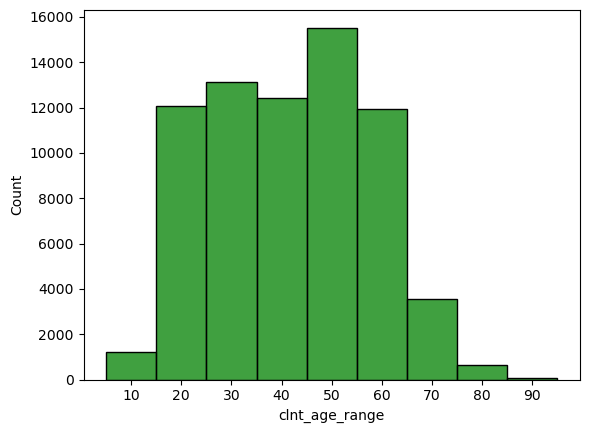

In [31]:
sns.histplot(df_fd['clnt_age_range'], bins=30, color="green")

## Notes:

- From this analysis we can see that the majority of our clients have had there accounts between the years of 20 and 30. 

- The age range that has the most clients is form 50. the over all client range is from 20 - 60 with outliers at the ranges of 10, 70, 80, and 90

### Visualizations

**Categorical Values**

In [158]:
frequency_table = df_fe_c['variation'].value_counts()
proportion_table = df_fe_c['variation'].value_counts(normalize=True)

frequency_table, proportion_table

(variation
 Test       26968
 Control    23532
 Name: count, dtype: int64,
 variation
 Test      0.53
 Control   0.47
 Name: proportion, dtype: float64)

In [176]:
frequency_gender = df_fd['gendr'].value_counts()
proportion_gender = df_fd['gendr'].value_counts(normalize=True)
frequency_gender, proportion_gender

(gendr
 U    24125
 M    23724
 F    22745
 Name: count, dtype: int64,
 gendr
 U   0.34
 M   0.34
 F   0.32
 Name: proportion, dtype: float64)

In [160]:
frequency_process_steps = test_subjects_df['process_step'].value_counts()
proportion_process_steps = test_subjects_df['process_step'].value_counts(normalize=True)
frequency_process_steps, proportion_process_steps

(process_step
 start      99162
 step_1     65548
 step_2     54631
 step_3     46875
 confirm    41415
 Name: count, dtype: int64,
 process_step
 start     0.32
 step_1    0.21
 step_2    0.18
 step_3    0.15
 confirm   0.13
 Name: proportion, dtype: float64)

In [31]:
# Create a list of categories sorted by total counts in descending order
category_order = ['Control','Test']
hue_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

<Axes: xlabel='variation', ylabel='count'>

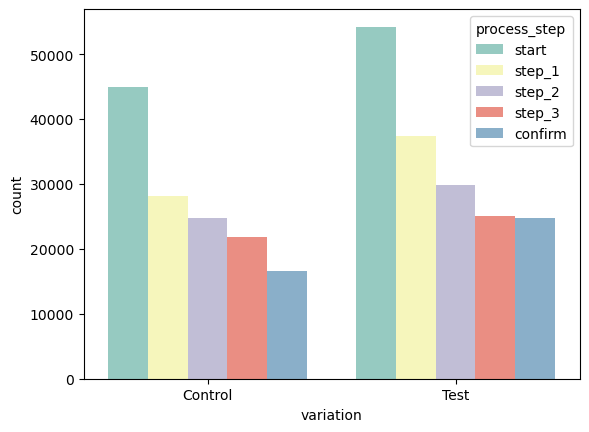

In [33]:
# Plotting a grouped bar chart
sns.countplot(data=test_subjects_df, x='variation', hue= 'process_step', palette='Set3', order = category_order, hue_order = hue_order)

C:\Users\aj824\AppData\Local\Temp\ipykernel_6572\4120208587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_gender.index, y=frequency_gender.values, palette="Set3");


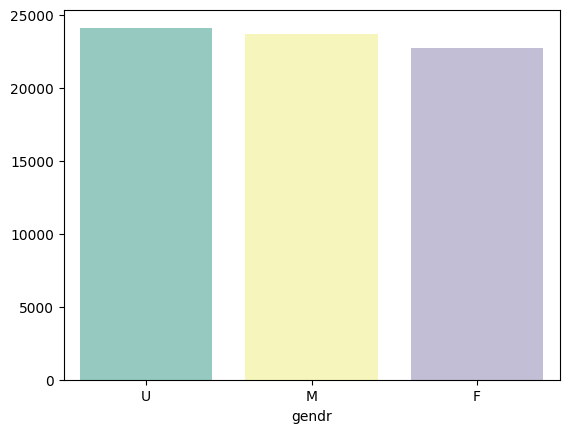

In [177]:
# Plotting a bar chart using the values from the frequency gender table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_gender.index, y=frequency_gender.values, palette="Set3");

**Numerical Values**

In [165]:
demographic_numerical = df_fd.select_dtypes("number")
demographic_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70594.00,5005025.75,2877289.31,169.00,2519542.75,5016973.50,7483074.25,9999839.00
clnt_tenure_yr,70594.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70594.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.18,15.60,13.00,32.00,47.00,59.00,96.00
num_accts,70594.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70594.00,147446.73,301510.58,13789.42,37346.60,63334.59,137546.12,16320040.15
calls_6_mnth,70594.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70594.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


**Shape of distribution**

In [166]:
client_age_skewness = demographic_numerical['clnt_age'].skew()
client_age_kurtosis = demographic_numerical['clnt_age'].kurtosis()

client_age_skewness, client_age_kurtosis

(0.08294227402556785, -0.9239629855316349)

<Axes: xlabel='clnt_age', ylabel='Count'>

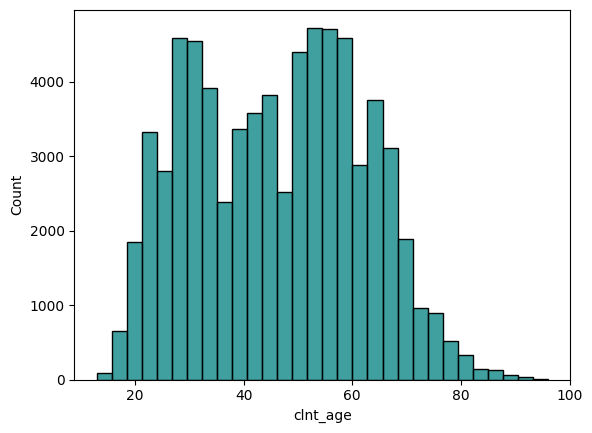

In [167]:
sns.histplot(demographic_numerical['clnt_age'], bins=30, color="teal")

<Axes: ylabel='clnt_age'>

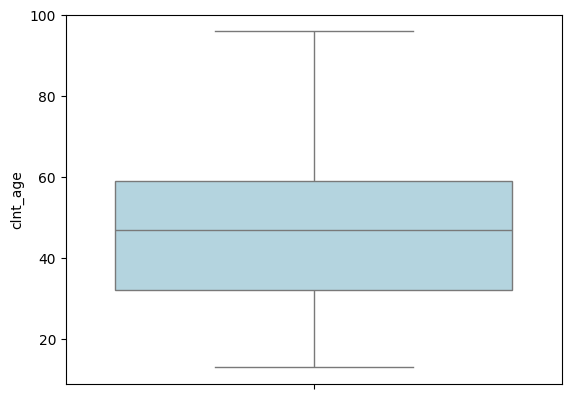

In [168]:
sns.boxplot(data = demographic_numerical['clnt_age'], color="lightblue")

In [169]:
year_tenure_skewness = demographic_numerical['clnt_tenure_yr'].skew()
year_tenure_kurtosis = demographic_numerical['clnt_tenure_yr'].kurtosis()

year_tenure_skewness, year_tenure_kurtosis

(1.0366247018480386, 1.0709232170805043)

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

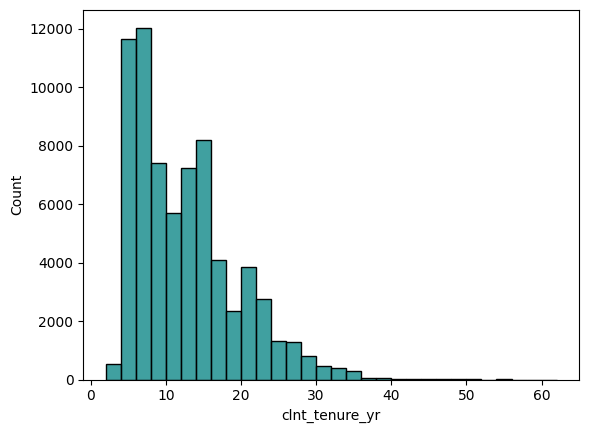

In [170]:
sns.histplot(demographic_numerical['clnt_tenure_yr'], bins=30, color="teal")

<Axes: ylabel='clnt_tenure_yr'>

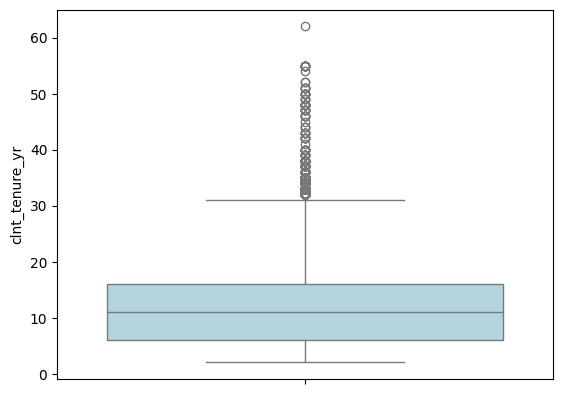

In [171]:
sns.boxplot(data = demographic_numerical['clnt_tenure_yr'], color="lightblue")

In [172]:
month_tenure_skewness = demographic_numerical['clnt_tenure_mnth'].skew()
month_tenure_kurtosis = demographic_numerical['clnt_tenure_mnth'].kurtosis()

month_tenure_skewness, month_tenure_kurtosis

(1.0506517922170102, 1.102446928017626)

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

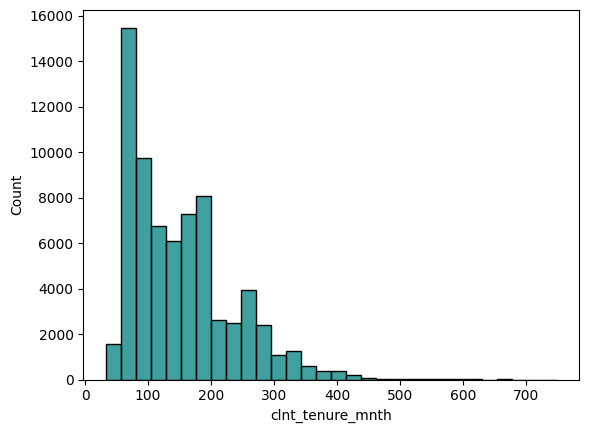

In [173]:
sns.histplot(demographic_numerical['clnt_tenure_mnth'], bins=30, color="teal")

<Axes: ylabel='clnt_tenure_mnth'>

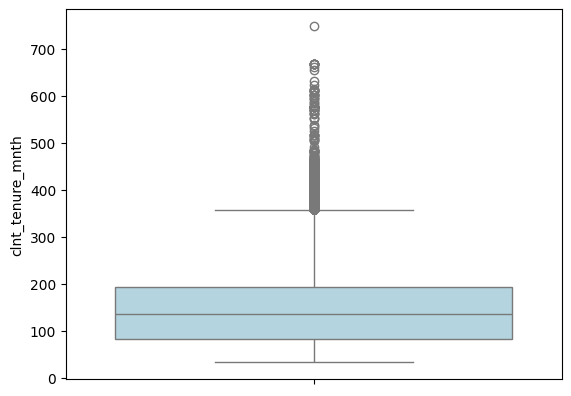

In [174]:
sns.boxplot(data = demographic_numerical['clnt_tenure_mnth'], color="lightblue")